# Notebook, showing the problem with Ukraine representation in AI-index

We show the errors in input data used in [Stanford AI Index 2019](https://hai.stanford.edu/ai-index/2019)

## Preamble

In [1]:
import pandas as pd
import numpy as np
import datetime
import os
%matplotlib inline



## Download and load data

In [2]:
if not os.path.isfile('23_7_2019_ai_index_papers.csv'):
    !wget https://github.com/Juan-Mateos/ai_index_data/raw/master/input_data/23_7_2019_ai_index_papers.csv
arx_papers = pd.read_csv('23_7_2019_ai_index_papers.csv',compression='zip')


In [3]:
arx_papers.head()

,Unnamed: 0,Unnamed: 0.1,article_id,article_created,article_updated,article_title,journal_ref,doi,summary,citation_count,...,institute_name,institute_city,institute_state,institute_lat,institute_lon,year_created,institute_country,institute_region,country_reg,dl_cat
0,0,0,0704.0002,2007-03-30,2008-12-13,Sparsity-certifying Graph Decompositions,NaN,NaN,"We describe a new algorithm, the $(k,\ell)$-...",18.0,...,Smith College,Northampton,Massachusetts,42.318119,-72.638139,2007,United States of America,Massachusetts,US_Massachusetts,not_dl
1,1,1,0705.1541,2007-05-10,NaN,Unfolding Manhattan Towers,NaN,NaN,We provide an algorithm for unfolding the su...,15.0,...,Smith College,Northampton,Massachusetts,42.318119,-72.638139,2007,United States of America,Massachusetts,US_Massachusetts,not_dl
2,2,2,0707.4258,2007-07-28,2009-06-24,Star Unfolding Convex Polyhedra via Quasigeode...,NaN,NaN,We extend the notion of star unfolding to be...,12.0,...,Smith College,Northampton,Massachusetts,42.318119,-72.638139,2007,United States of America,Massachusetts,US_Massachusetts,not_dl
3,3,3,0709.1942,2007-09-12,NaN,Connecting Polygonizations via Stretches and T...,NaN,NaN,We show that the space of polygonizations of...,4.0,...,Smith College,Northampton,Massachusetts,42.318119,-72.638139,2007,United States of America,Massachusetts,US_Massachusetts,not_dl
4,4,4,0709.3554,2007-09-21,NaN,A New Lower Bound on Guard Placement for Wirel...,NaN,NaN,The problem of wireless localization asks to...,8.0,...,Smith College,Northampton,Massachusetts,42.318119,-72.638139,2007,United States of America,Massachusetts,US_Massachusetts,not_dl


Two of the most cited Ukrainian papers are [HardNet](https://papers.nips.cc/paper/7068-working-hard-to-know-your-neighbors-margins-local-descriptor-learning-loss) (NeurIPS 2017), 
[113 citations](https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q=Working+hard+to+know+your+neighbor%27s+margins&btnG=) on March 1, 2020


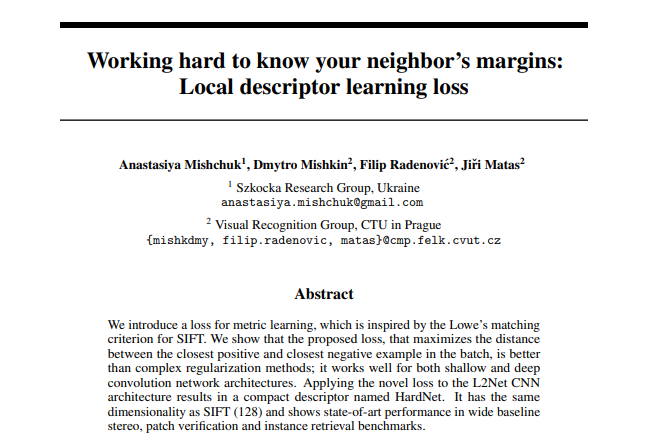

and [DeblurGAN](http://openaccess.thecvf.com/content_cvpr_2018/html/Kupyn_DeblurGAN_Blind_Motion_CVPR_2018_paper.html) (CVPR 2018),
[252 citations](https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q=Deblurgan%3A+Blind+motion+deblurring+using+conditional+adversarial+networks&btnG=), [1.6k github stars](https://github.com/KupynOrest/DeblurGAN)

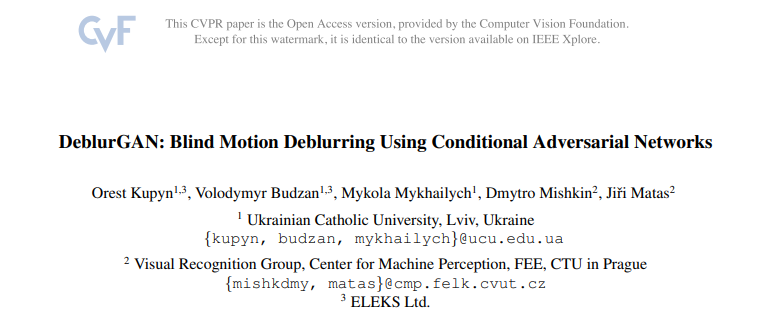

Let's find them in the input data

In [4]:
mask = arx_papers.article_title.str.contains('DeblurGAN')
arx_papers[mask]

,Unnamed: 0,Unnamed: 0.1,article_id,article_created,article_updated,article_title,journal_ref,doi,summary,citation_count,...,institute_name,institute_city,institute_state,institute_lat,institute_lon,year_created,institute_country,institute_region,country_reg,dl_cat
116620,284897,284897,1711.07064,2017-11-19,2018-04-03,DeblurGAN: Blind Motion Deblurring Using Condi...,NaN,NaN,"We present DeblurGAN, an end-to-end learned ...",35.0,...,Czech Technical University in Prague,Prague,NaN,50.103738,14.391456,2017,Czech Republic,Prague,CZ_Prague,dl
128738,297213,297213,1711.07064,2017-11-19,2018-04-03,DeblurGAN: Blind Motion Deblurring Using Condi...,NaN,NaN,"We present DeblurGAN, an end-to-end learned ...",35.0,...,Catholic University of America,Washington D.C.,District of Columbia,38.936882,-76.998694,2017,United States of America,Washington,US_Washington,dl


In [5]:
mask = arx_papers.article_title.str.contains('Working hard')
arx_papers[mask]

,Unnamed: 0,Unnamed: 0.1,article_id,article_created,article_updated,article_title,journal_ref,doi,summary,citation_count,...,institute_name,institute_city,institute_state,institute_lat,institute_lon,year_created,institute_country,institute_region,country_reg,dl_cat
116605,284882,284882,1705.10872,2017-05-30,2018-01-12,Working hard to know your neighbor's margins: ...,NaN,NaN,We introduce a novel loss for learning local...,14.0,...,Czech Technical University in Prague,Prague,NaN,50.103738,14.391456,2017,Czech Republic,Prague,CZ_Prague,dl


As we can see, both of the papers ARE in the rating, but have wrong country labels

Some other papers have both incorrect institution affiliation and not connected to Ukraine again:
https://arxiv.org/abs/1808.10862
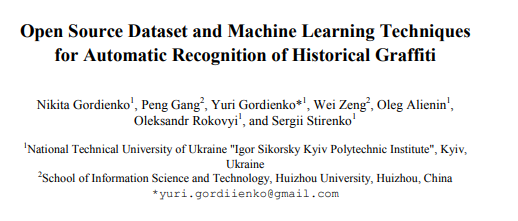

In [6]:
mask = arx_papers.article_title.str.contains('Graffiti')
arx_papers[mask]

,Unnamed: 0,Unnamed: 0.1,article_id,article_created,article_updated,article_title,journal_ref,doi,summary,citation_count,...,institute_name,institute_city,institute_state,institute_lat,institute_lon,year_created,institute_country,institute_region,country_reg,dl_cat
84890,247094,247094,1808.10862,2018-08-31,NaN,Open Source Dataset and Machine Learning Techn...,"In: Cheng L., Leung A., Ozawa S. (eds) Neural ...",10.1007/978-3-030-04221-9_37,Machine learning techniques are presented fo...,0.0,...,Lutsk National Technical University,Lutsk,NaN,NaN,NaN,2018,NaN,NaN,NaN,dl
169016,348281,348281,1808.10862,2018-08-31,NaN,Open Source Dataset and Machine Learning Techn...,"In: Cheng L., Leung A., Ozawa S. (eds) Neural ...",10.1007/978-3-030-04221-9_37,Machine learning techniques are presented fo...,0.0,...,Huizhou University,Huizhou,NaN,23.03805,114.42194,2018,China,Guangdong,CN_Guangdong,dl
